In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [33]:
df = pd.read_csv(f"out/study/scores_df.csv")
df.head(60)

,id,version,sus,pretest,score,pilot
0,elephant,A,95.0,1.00,0.80,0.0
1,penguin,B,87.5,0.79,0.45,0.0
2,peacock,A,87.5,0.71,0.84,0.0
3,eagle,B,100.0,0.86,0.35,0.0
4,giraffe,A,90.0,0.79,0.67,0.0
5,hippo,B,75.0,0.79,0.51,0.0
6,rhino,A,70.0,0.79,0.51,0.0
7,pA,A,80.0,0.93,0.76,1.0
8,pB,A,95.0,0.93,0.88,1.0
9,pC,B,87.5,0.71,0.69,1.0


In [34]:
df_f = df[df.pilot == 0]
a = df_f[df_f.version == "A"]
b = df_f[df_f.version == "B"]
print(a["score"].mean(), a["score"].std(), b["score"].mean(), b["score"].std())

0.7050000000000001 0.14888474289418197 0.475 0.10115993936995678


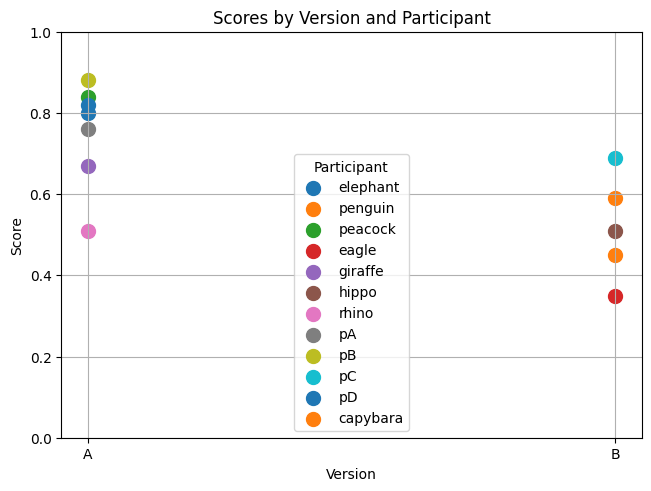

In [35]:
fig, ax = plt.subplots(layout='constrained')

# Loop through each participant and plot their scores
for participant in df['id'].unique():
    # Filter the DataFrame for the current participant
    participant_data = df[df['id'] == participant]
    
    # Plot the scores for this participant
    plt.scatter(participant_data['version'], participant_data['score'], label=participant, s=100)

# Add labels and title
ax.set_title('Scores by Version and Participant')
ax.set_xlabel('Version')
ax.set_ylabel('Score')
ax.set_ylim(0, 1)

# Show legend to differentiate participants
plt.legend(title='Participant')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [173]:
plt.savefig(f'out/{participant}-correctness.png')

<Figure size 640x480 with 0 Axes>

In [36]:
df = pd.read_csv(f"out/study/per_question.csv")
df.head(40)

,id,question,version,time_elapsed,proof,score,pilot,order
0,elephant,qID-2,B,82.740,P1,1.0,0,0
1,elephant,qID-3,B,10.533,P1,1.0,0,0
2,elephant,qID-1,B,9.354,P1,1.0,0,0
3,elephant,qID-3,B,8.984,P2,1.0,0,0
4,elephant,qID-2,B,8.384,P2,1.0,0,0
5,elephant,qID-1,B,7.033,P2,1.0,0,0
6,elephant,qID-1,B,7.937,P4,1.0,0,0
7,elephant,qID-13,B,6.976,P4,1.0,0,0
8,elephant,qID-12,B,7.880,P4,1.0,0,0
9,elephant,qID-11,B,63.826,P4,1.0,0,0


In [40]:
df_a = df[(df.version == "A")& (df.pilot == 0)]
df_b = df[(df.version == "B") & (df.pilot == 0)]
a_fixes = df_a[df_a.question == "qID-13"]
b_fixes = df_b[df_b.question == "qID-13"]

print(f"a: {len(a_fixes[a_fixes.score == 1])}/{len(a_fixes)} = {len(a_fixes[a_fixes.score == 1])/len(a_fixes)}, b: {len(b_fixes[b_fixes.score == 1])}/{len(b_fixes)} = {len(b_fixes[b_fixes.score == 1])/len(b_fixes)}")

a: 9/16 = 0.5625, b: 4/17 = 0.23529411764705882


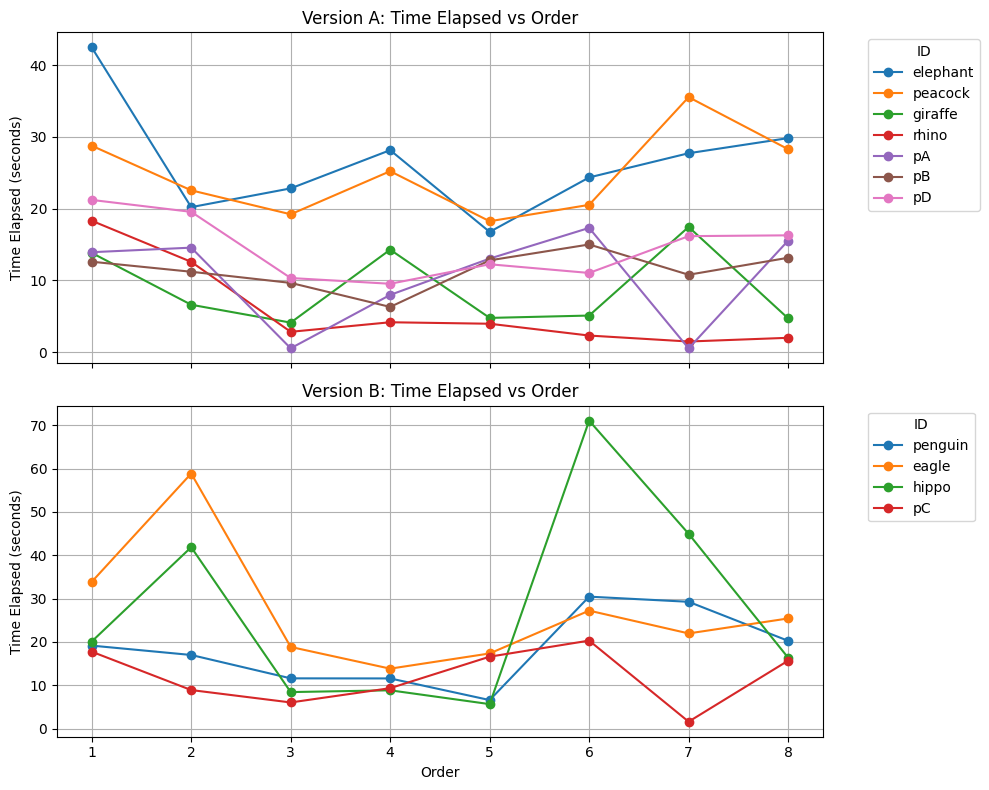

In [22]:
steps = {
    "T1_S1_C1": 7,
    "T1_S1_C2": 9,
    "T1_S1_IN1": 5,
    "T1_S1_IN2": 5,
    "T1_S1_IN3": 6,
    "T1_S2_C2": 10,
    "T1_S2_IN1": 9,
    "T1_S2_IN2": 8,
}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Filter data for version A and version B
questions_to_include = ['qID-0']
df = df[df['question'].isin(questions_to_include)]

df_A = df[df['version'] == 'A']
df_B = df[df['version'] == 'B']

time_per_step = lambda df: df['time_elapsed'] / steps[df['proof'].values[0]]

# Plot for version A (Top subplot)
for participant in df_A['id'].unique():
    participant_data = df_A[df_A['id'] == participant]
    ax1.plot(participant_data['order'], time_per_step(participant_data), label=participant, marker='o')

ax1.set_title('Version A: Time Elapsed vs Order')
ax1.set_ylabel('Time Elapsed (seconds)')
ax1.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Plot for version B (Bottom subplot)
for participant in df_B['id'].unique():
    participant_data = df_B[df_B['id'] == participant]
    ax2.plot(participant_data['order'], time_per_step(participant_data), label=participant, marker='o')

ax2.set_title('Version B: Time Elapsed vs Order')
ax2.set_xlabel('Order')
ax2.set_ylabel('Time Elapsed (seconds)')
ax2.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

,proof,time_elapsed,id,version
0,P4,136.499,elephant,B
1,P5,103.490,hippo,B
2,P7,117.879,penguin,B
3,T1_S1_C1,1432.307,elephant,A
4,T1_S1_C2,1625.239,elephant,A
5,T1_S1_IN1,1139.331,elephant,A
6,T1_S1_IN2,929.287,elephant,A
7,T1_S1_IN3,1165.184,elephant,A
8,T1_S2_C2,1135.043,elephant,A
9,T1_S2_IN1,1761.861,elephant,A


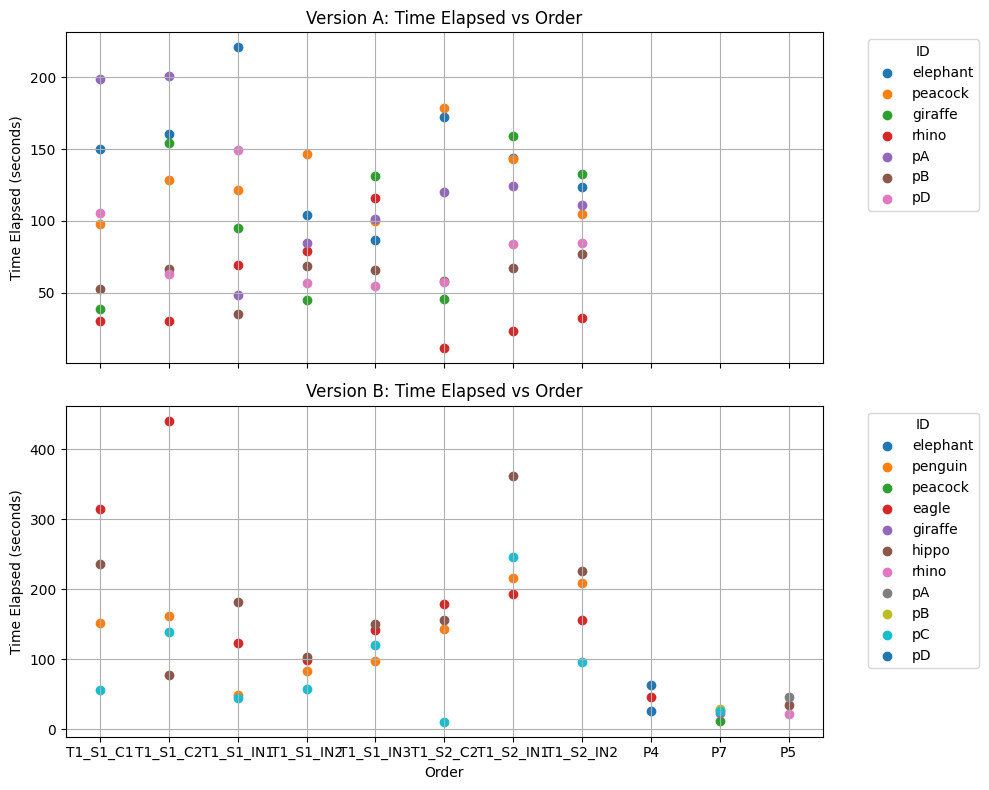

In [31]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

df_A = df[df['version'] == 'A']
df_B = df[df['version'] == 'B']

time_per_step = lambda df: df['time_elapsed'] / steps[df['proof'].values[0]]

def aggregate_time(df):
    questions_to_include = ['qID-0', 'qID-11']
    df = df[df['question'].isin(questions_to_include)]

    df_sum = df.groupby('proof', as_index=False).agg({'time_elapsed': 'sum', 'id': 'first', 'version': 'first'})
    return df_sum

# Plot for version A (Top subplot)
for participant in df_A['id'].unique():
    participant_data = df_A[df_A['id'] == participant]
    participant_data = aggregate_time(participant_data)
    ax1.scatter(participant_data['proof'], participant_data['time_elapsed'], label=participant, marker='o')

ax1.set_title('Version A: Time Elapsed vs Order')
ax1.set_ylabel('Time Elapsed (seconds)')
ax1.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Plot for version B (Bottom subplot)
for participant in df_B['id'].unique():
    participant_data = df_B[df_B['id'] == participant]
    participant_data = aggregate_time(participant_data)
    ax2.scatter(participant_data['proof'], participant_data['time_elapsed'], label=participant, marker='o')

ax2.set_title('Version B: Time Elapsed vs Order')
ax2.set_xlabel('Order')
ax2.set_ylabel('Time Elapsed (seconds)')
ax2.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [175]:
plt.savefig(f'out/{participant}-time.png')

<Figure size 640x480 with 0 Axes>

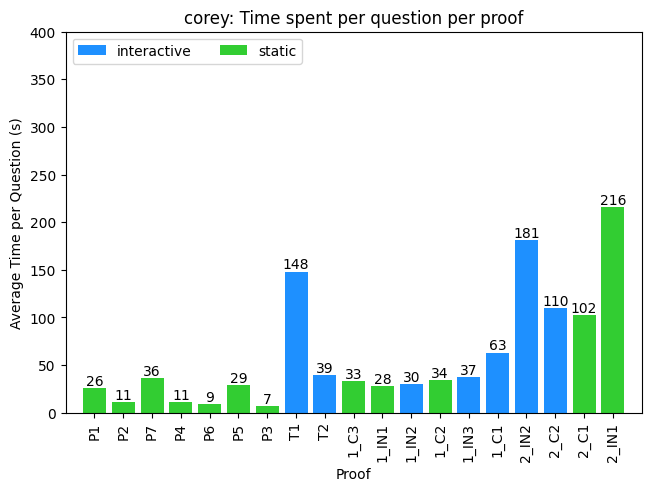

<Figure size 640x480 with 0 Axes>

In [176]:
# for a participant, split by condition and by proof and question and vs correctness
proofs = list(df['pageName'].unique())
non_proofs = ["Background Questions", "Interactive SUS", "Static SUS"]
[proofs.remove(e) for e in non_proofs]

width = 0.5  # the width of the bars
fig, ax = plt.subplots(layout='constrained')
x, y1, y2 = [], [], []
for proof, obj in per_proof.items():
    if proof in set(non_proofs):
        continue
    x.append(proof)
    avgT = int(obj["d"]/obj["n"])
    y1.append(avgT if obj["c"] == "interactive" else 0)
    y2.append(avgT if not obj["c"] == "interactive" else 0)
    plt.text(proof, avgT + 3, avgT, horizontalalignment='center')
    
p1 = ax.bar(x, y1, label="interactive", color="dodgerblue")
p2 = ax.bar(x, y2, bottom=y1c, label="static", color="limegreen")
# ax.bar_label(p1, padding=3)
# ax.bar_label(p2, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Time per Question (s)')
ax.set_xlabel('Proof')
ax.set_title(f'{participant}: Time spent per question per proof')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 400)
plt.xticks(rotation=90)
ax.set_xlim(-1, len(proofs))

plt.show()
plt.savefig(f'out/{participant}-timeperquestion.png')

['pretest', 'tutorial', 'phase1', 'phase2'] [78, 0, 77, 66] [0, 33, 90, 50]


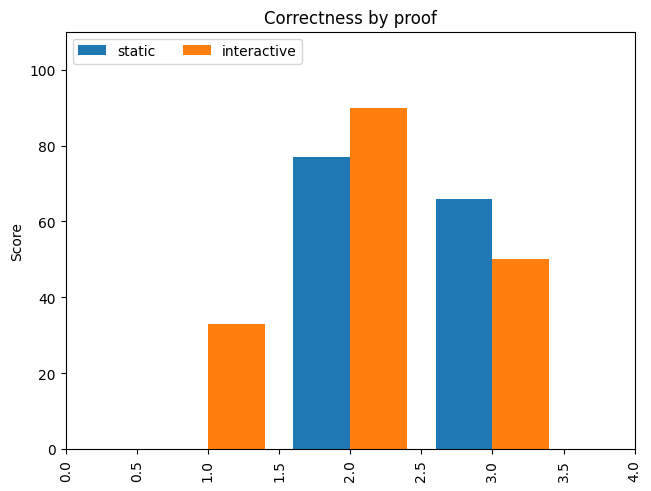

In [158]:
concat_df = pd.read_csv("out/concat_df.csv")
#a = max pts, s = score, percent = percent correctness
def update_score(phase, row, scores):
    c, s, k = row['condition'], row['score'], row['key']
    new_proof = {"s": 0, "a": 0, "percent": 0}
    scores[phase] = scores.get(phase, {})
    scores[phase][c] = scores.get(phase).get(c, {"s": 0, "a": 0, "percent": 0})
    scores[phase][c]["s"] = scores[phase][c]["s"] + s
    scores[phase][c]["a"] = scores[phase][c]["a"] + (1 if k else 0)
    return scores
    
scores, per_proof = {}, {}
for idx, row in df.iterrows():
    p, c, s, k, d, q = row['pageName'], row['condition'], row['score'], row['key'], row["delta"], row["question"]
    if p.startswith("P"):
        update_score("pretest", row, scores)
    elif p.startswith("T1_S1_"):
        update_score("phase1", row, scores)
        p = p.replace("T1_S", "")
    elif p.startswith("T1_S2_"):
        if not np.isnan(s):
            update_score("phase2", row, scores)
        p = p.replace("T1_S", "")
    elif p.startswith("Tutorial"):
        update_score("tutorial", row, scores)
        p = p.replace("TutorialProof", "T")

    # a = max pts, s = score, p = % correctness, c = condition, n = # questions student answered
    per_proof[p] = per_proof.get(p, {"a": 0, "s": 0, "p": 0, "c": c, "d": 0, "n": 0})
    if not np.isnan(s):
        per_proof[p]["s"] = per_proof[p]["s"] + s
    if k:
        per_proof[p]["a"] = per_proof[p]["a"] + 1

    #don't count time or # of questions for the follow-up stage 2 questions
    if p.startswith("2_") and not q.endswith("1"):
        print("skipping", q, p)
        continue
    per_proof[p]["d"] = int(per_proof[p]["d"] + d)
    per_proof[p]["n"] = per_proof[p]["n"] + 1


for k, v in scores.items():
    for kk, vv in scores[k].items():
        scores[k][kk]["p"] = int(100 * scores[k][kk]["s"] / scores[k][kk]["a"]) if scores[k][kk]["a"] > 0 else 0

for k, v in per_proof.items():
    per_proof[k]["p"] = int(100 * per_proof[k]["s"] / per_proof[k]["a"])
pprint.pp(scores)
pprint.pp(per_proof)